# Descriptive Statististical Analysis: Grades Districts Dataset

The following dataset contains information about various schools throughout various districts within a state. 




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm


In [3]:
df= pd.read_csv('education_districtwise.csv')
#drop the missing values:
df= df.dropna()

In [4]:
df.head()

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 679
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DISTNAME    634 non-null    object 
 1   STATNAME    634 non-null    object 
 2   BLOCKS      634 non-null    int64  
 3   VILLAGES    634 non-null    int64  
 4   CLUSTERS    634 non-null    int64  
 5   TOTPOPULAT  634 non-null    float64
 6   OVERALL_LI  634 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.6+ KB


In [6]:
df.describe()

,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
count,634.000000,634.000000,634.000000,6.340000e+02,634.000000
mean,11.118297,899.619874,124.610410,1.899024e+06,73.395189
std,9.799581,632.473675,95.821688,1.547475e+06,10.098460
min,1.000000,6.000000,1.000000,7.948000e+03,37.220000
25%,6.000000,396.750000,60.000000,8.226940e+05,66.437500
50%,8.000000,816.500000,105.000000,1.564392e+06,73.490000
75%,13.000000,1231.500000,167.000000,2.587520e+06,80.815000
max,66.000000,3963.000000,592.000000,1.105413e+07,98.760000


#### We can use describe() to compute descriptive stats:

1. count: Number of non-NA/null observations
2. mean: The arithmetic average
3. std: The standard deviation
4. min: The smallest (minimum) value
5. 25%: The first quartile (25th percentile)
6. 50%: The median (50th percentile)
7. 75%: The third quartile (75th percentile)
8. max: The largest (maximum) value

The summary of stats gives us valuable information about the overall literacy rate. For example, the mean helps to clarify the center of your dataset; we now know the average literacy rate is about 73% for all districts. This information is useful in itself and also as a basis for comparison. Knowing the mean literacy rate for all districts helps us understand which individual districts are significantly above or below the mean.

Note: describe() excludes missing values (NaN) in the dataset from consideration. You may notice that the count, or the number of observations for OVERALL_LI (634), is fewer than the number of rows in the dataset (680). Dealing with missing values is a complex issue outside the scope of this course.

You can also use the describe() function for a column with categorical data, like the STATNAME column.

For a categorical column, describe() gives you the following output:

count: Number of non-NA/null observations
unique: Number of unique values
top: The most common value (the mode)
freq: The frequency of the most common value

In [7]:
df['STATNAME'].describe()

count         634
unique         36
top       STATE21
freq           71
Name: STATNAME, dtype: object

Data reveals that there are 35 unique states. The top catergory is State21 or value with most occurance/mode and freq tells us that there are 75 occurances of State21.

In [8]:
#Compute range:
range_overall_li = df['OVERALL_LI'].max() - df['OVERALL_LI'].min()
range_overall_li
#61.54

61.540000000000006

The range in literacy rates for all districts is about 61.5 percentage points.

This large difference tells you that some districts have much higher literacy rates than others. Later on, you will continue to analyze this data, and you can discover which districts have the lowest literacy rates. This will help the government better understand literacy rates nationally and build on their successful educational programs.

#### Visualization
We will take a look at the probability distribution using a histogram:

<Axes: >

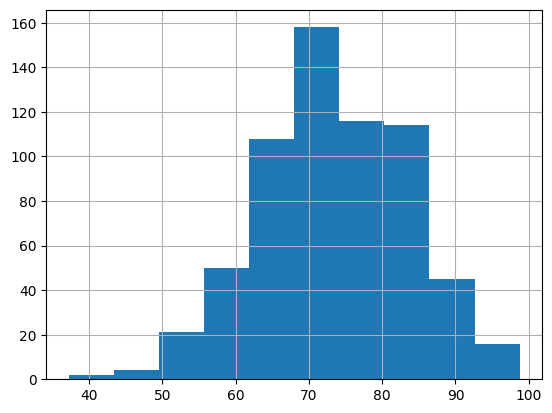

In [9]:
df['OVERALL_LI'].hist()

The histogram shows that the literacy reate is nomrally disbruted since there is a bell shape curve with the mean being around 73%.

#### Empirical rule

Since the normal distribution seems like a good fit for the district literacy rate data, we can expect the empirical rule to apply relatively well. Recall that the empirical rule says that for a normal distribution:

68% of the values fall within +/- 1 SD from the mean
95% of the values fall within +/- 2 SD from the mean
99.7% of the values fall within +/- 3 SD from the mean

NOTE: "SD" stands for standard deviation.

In other words, we can expect that about:

68% of district literacy rates will fall within +/- 1 SD from the mean.
95% of district literacy rates will fall within +/- 2 SD from the mean.
99.7% of district literacy rates will fall within +/- 3 SD from the mean.

In [10]:
#mean
df_mean = df['OVERALL_LI'].mean()
df_mean

73.39518927444797

In [11]:
#standard deviation
df_std= df['OVERALL_LI'].std()
df_std

10.098460413782469

We can observe a lower limit and upper limit 1 std away from the mean with lower limit being < than 1 std below mean, and upper limit  1 std/ > or above the mean.


In [12]:
lower_limit = df_mean -1 * df_std
upper_limit = df_mean +1 * df_std
((df['OVERALL_LI'] >= lower_limit) & (df['OVERALL_LI'] <= upper_limit)).mean()

0.6640378548895899

We will do this with 2 std away from the mean.

In [13]:
lower_limit = df_mean -2 * df_std
upper_limit = df_mean +2 * df_std
((df['OVERALL_LI'] >= lower_limit) & (df['OVERALL_LI'] <= upper_limit)).mean()

0.9542586750788643

The values agree quite well with the empirical rule.

Our values of 66.4%, 95.4%, and 99.6% are very close to the values the empirical rule suggests: roughly 68%, 95%, and 99.7%.

We will find the z score o meanture how many standard deviations below or above the poluplation mean a data point is. This is helpful for detecing outliers, for instance. Any standard deviation 3 and up is going to be an outlier, more than likely.

In [14]:
df['Z_SCORE'] = stats.zscore(df['OVERALL_LI'])
df

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92,-0.641712
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93,-0.640721
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21,-0.216559
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98,-1.527694
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00,-0.831990
...,...,...,...,...,...,...,...,...
675,DISTRICT522,STATE29,37,876,137,5296396.0,78.05,0.461307
676,DISTRICT498,STATE29,64,1458,230,4042191.0,56.06,-1.717972
677,DISTRICT343,STATE29,59,1117,216,3483648.0,65.05,-0.827035
678,DISTRICT130,STATE29,51,993,211,3522644.0,66.16,-0.717030


In [15]:
#calculate 3 std above and below mean:
df[(df['Z_SCORE'] > 3) | (df['Z_SCORE'] < -3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


 There are two outliers. DISTRICT461 and DISTRICT429. The literacy rates in these two districts are more than 3 SDs below the overall mean literacy rate.

## Example of sampling distribution:
We want to data on district literacy rates but are only using a portion of the population.

 - Total number of districts in sample:634 (see df.info)
 - random sample of 50 using .sample(n, replace, random_state) from pandas
     - n refers to the desired sample size.
     - replace indicates whether you are sampling with or without replacement.
 - random_state refers to the seed/starting point of the random number which can be any number.



In [16]:
sample_data= df.sample(n=50, replace=True, random_state =31208)
sample_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14,1.857670
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49,-2.071771
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14,-1.115425
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33,0.290849
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70,1.318549
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35,-0.499994
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94,-1.333452
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69,-0.466299
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31,1.081692
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61,-0.375124


In [17]:
# We want to calculate the mean of the sample data: 74.22
estimate1 = sample_data['OVERALL_LI'].mean()
estimate1

74.22359999999999

In [18]:
#compare mean of sample:74.24
estimate2 = df['OVERALL_LI'].sample(n=50, replace=True, random_state= 56810).mean()
estimate2

74.24780000000001

#### Centrail Limit Theorem

This theorem states that when data is large enough, the mean of the sample data will match that of the larger population. Both saamples are really close.

We should also observe a normal distribution pattern/bell cuve where the mean is nearly identicle to population mean.

<Axes: >

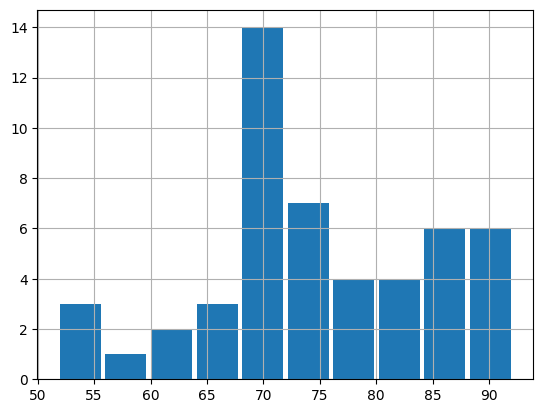

In [19]:
sample_data["OVERALL_LI"].hist(rwidth=0.9)


As we can see, the mode or most occurance lies around 70 which reflect the population mean.

In [20]:
#you can also check the mean for a random sample like this:
#changing the sample size changes the result/mean, with greater number being more accurate.

estimate_list =[]
for i in range(10000):
    estimate_list.append(df['OVERALL_LI'].sample(n=50, replace=True).mean())
estimate_df= pd.DataFrame(data={'estimate': estimate_list})

In [21]:
mean_sample_means= estimate_df['estimate'].mean()
mean_sample_means #73.4%

73.39447410000024

array([[<Axes: title={'center': 'estimate'}>]], dtype=object)

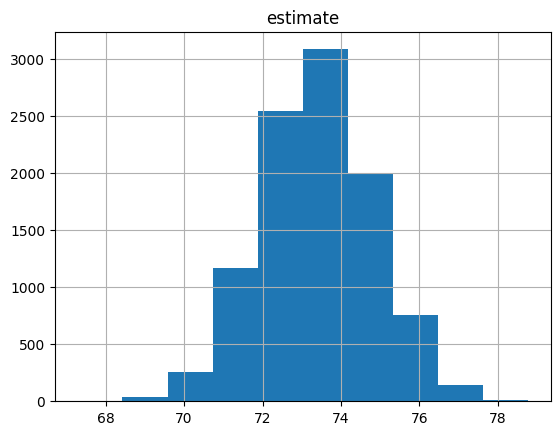

In [22]:
# distribution of the estimate_df:
estimate_df.hist()

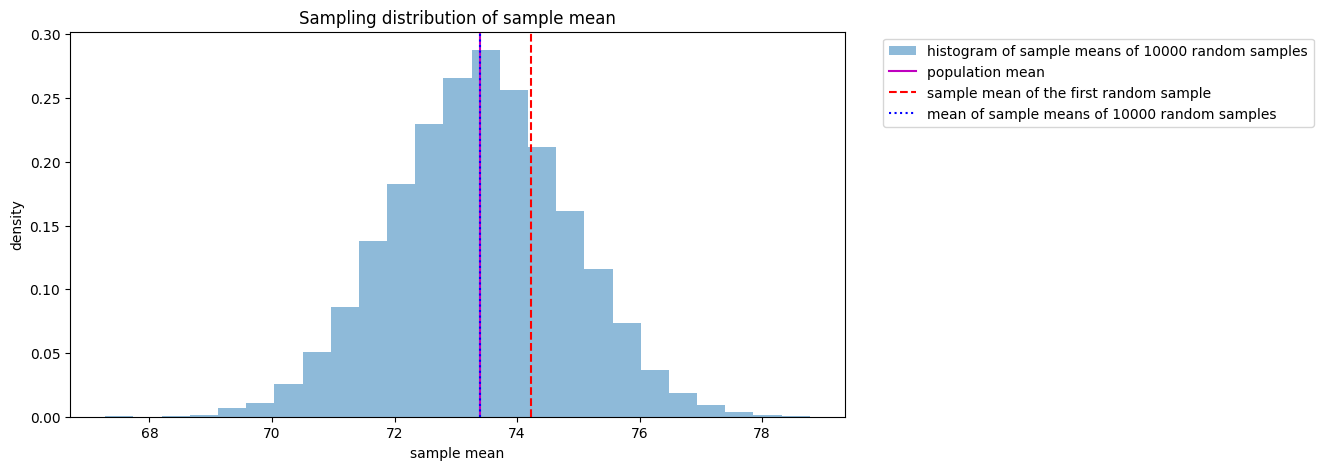

In [36]:
 # Generate a grid of 100 values from xmin to xmax.

 ### YOUE CODE HERE ###
plt.figure(figsize=(10,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.5, label = "histogram of sample means of 10000 random samples")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) # generate a grid of 100 values from xmin to xmax.
p = stats.norm.pdf(x, estimate1, df_std)


plt.axvline(x=df_mean, color='m', linestyle = 'solid', label = 'population mean')
plt.axvline(x=estimate1, color='r', linestyle = '--', label = 'sample mean of the first random sample')
plt.axvline(x=mean_sample_means, color='b', linestyle = ':', label = 'mean of sample means of 10000 random samples')
plt.title("Sampling distribution of sample mean")
plt.xlabel('sample mean')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.04,1));

#### Summary:
- The first sample of 50 districts estimated the mean district literacy rate is 74.22 percent, which is relatively close to the population mean of 73.4 percent.

- To ensure your estimate will be useful to the government, you can compare the nation's literacy rate to other benchmarks, such as the global literacy rate or the literacy rate of peer nations. If the nation's literacy rate is below these benchmarks, this may help convince the government to devote more resources to improving literacy across the country.

